<a href="https://colab.research.google.com/github/sury1999/Data-Science-Projects/blob/main/Roundhacks_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install statsmodels==0.10.0rc2 --pre --user


In [2]:
#Setting figure size
plt.rc('figure', figsize=(14, 6))

In [3]:
tb1 = pd.read_csv('/content/sample_submission.csv')
tb1.head()

,prediction
0,5.57
1,5.57
2,5.57
3,5.57
4,5.57


In [4]:
test_series = pd.read_csv('/content/new_test.csv')
test_series.tail()

,date
3556,26-09-2020
3557,27-09-2020
3558,28-09-2020
3559,29-09-2020
3560,30-09-2020


In [5]:
df = pd.read_csv('/content/new_train.csv',
                parse_dates=['date'],
                index_col=['date'])
df.head()

,temp
date,
1980-01-01,4.16
1980-02-01,4.06
1980-03-01,7.12
1980-04-01,9.23
1980-05-01,3.20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11323 entries, 1980-01-01 to 2010-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    11323 non-null  float64
dtypes: float64(1)
memory usage: 176.9 KB


In [7]:
df.describe()

,temp
count,11323.000000
mean,15.573259
std,7.877191
min,-5.110000
25%,8.390000
50%,15.990000
75%,22.055000
max,32.390000


In [8]:
months = df.index.month
df.groupby(months)['temp'].mean()


date
1      8.905016
2      9.935354
3     11.923642
4     15.267731
5     17.630000
6     19.574720
7     21.925369
8     22.311811
9     19.477602
10    16.330676
11    13.062613
12    10.200083
Name: temp, dtype: float64

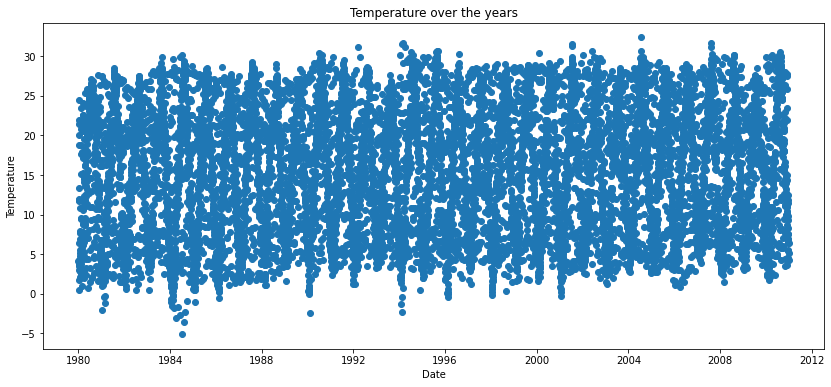

In [9]:
plt.scatter(df.index,df['temp'])
plt.title('Temperature over the years')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [10]:
y = df.groupby(df.index.year)['temp'].mean()

In [11]:
n = pd.Series(i for i in range(1980,2011))


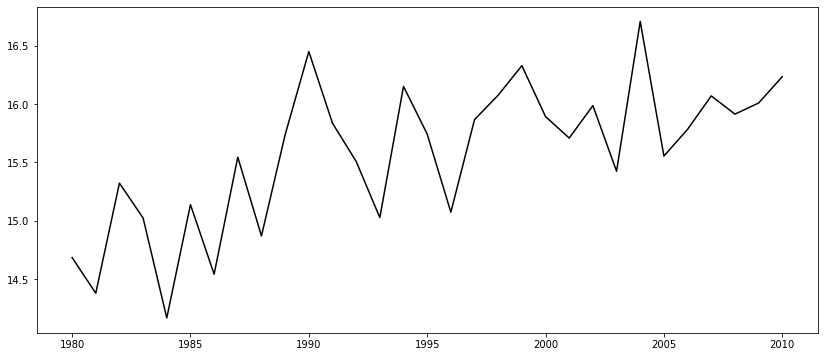

In [12]:
plt.plot(n, y, label='train_data',color='black')
plt.show()

/root/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/root/.local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
